In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def f_expr(expression):
    #Função para criar uma função a partir de uma expressão
    ## Entrada: expressão em formato de string
    ## Saída: função em formato de lambda
    
    return eval(f'lambda x, y: {expression}')   

In [4]:
def InterpretacaoGrafica(x,y):
    
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpretação Gráfica - Método de Runge Kutta 4° Ordem')
    plt.plot(x,y)
    plt.show()

In [5]:
def InterpretacaoGraficaMultiplasCurvas(t_values, y1_values, y2_values):
    """
    Função para plotar as soluções y1(t) e y2(t) de um sistema de equações diferenciais.
    
    Parâmetros:
        - t_values: Lista de valores de tempo
        - y1_values: Lista de valores de y1 correspondentes
        - y2_values: Lista de valores de y2 correspondentes
    """
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y1_values, label='$y_1(t)$', color='blue')
    plt.plot(t_values, y2_values, label='$y_2(t)$', color='red')
    plt.xlabel('Tempo ($t$)')
    plt.ylabel('Solução')
    plt.title('Soluções das Equações Diferenciais')
    plt.legend()
    plt.grid(True)
    plt.show()



In [6]:
def runge_kutta_4th_order_single_eq(f, x0, y0, h, n):
    """
    Implementação do método de Runge-Kutta de quarta ordem para resolver uma única equação diferencial.
    
    Parâmetros:
        - f: Função que define a equação diferencial dy/dx = f(x, y)
        - x0: Valor inicial de x
        - y0: Valor inicial de y correspondente a x0
        - h: Tamanho do passo
        - n: Número de passos
        
    Retorna:
        - x_values: Lista com os valores de x
        - y_values: Lista com os valores de y correspondentes
    """
    x_values = [x0]
    y_values = [y0]
    
    for i in range(n):
        k1 = h * f(x_values[-1], y_values[-1])
        k2 = h * f(x_values[-1] + h/2, y_values[-1] + k1/2)
        k3 = h * f(x_values[-1] + h/2, y_values[-1] + k2/2)
        k4 = h * f(x_values[-1] + h, y_values[-1] + k3)
        
        y_next = y_values[-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_next = x_values[-1] + h
        
        x_values.append(x_next)
        y_values.append(y_next)
    
    return x_values, y_values

In [7]:
def runge_kutta_4th_order_system(f, g, t0, x0, y0, h, n):
    """
    Implementação do método de Runge-Kutta de quarta ordem para resolver um sistema de duas equações diferenciais.
    
    Parâmetros:
        - f: Função que define a primeira equação diferencial dx/dt = f(t, x, y)
        - g: Função que define a segunda equação diferencial dy/dt = g(t, x, y)
        - t0: Valor inicial de t
        - x0: Valor inicial de x correspondente a t0
        - y0: Valor inicial de y correspondente a t0
        - h: Tamanho do passo
        - n: Número de passos
        
    Retorna:
        - t_values: Lista com os valores de t
        - x_values: Lista com os valores de x correspondentes
        - y_values: Lista com os valores de y correspondentes
    """
    t_values = [t0]
    x_values = [x0]
    y_values = [y0]
    
    for i in range(n):
        k1_x = h * f(t_values[-1], x_values[-1], y_values[-1])
        k1_y = h * g(t_values[-1], x_values[-1], y_values[-1])
        
        k2_x = h * f(t_values[-1] + h/2, x_values[-1] + k1_x/2, y_values[-1] + k1_y/2)
        k2_y = h * g(t_values[-1] + h/2, x_values[-1] + k1_x/2, y_values[-1] + k1_y/2)
        
        k3_x = h * f(t_values[-1] + h/2, x_values[-1] + k2_x/2, y_values[-1] + k2_y/2)
        k3_y = h * g(t_values[-1] + h/2, x_values[-1] + k2_x/2, y_values[-1] + k2_y/2)
        
        k4_x = h * f(t_values[-1] + h, x_values[-1] + k3_x, y_values[-1] + k3_y)
        k4_y = h * g(t_values[-1] + h, x_values[-1] + k3_x, y_values[-1] + k3_y)
        
        x_next = x_values[-1] + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
        y_next = y_values[-1] + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
        t_next = t_values[-1] + h
        
        t_values.append(t_next)
        x_values.append(x_next)
        y_values.append(y_next)
    
    return t_values, x_values, y_values


### Calcular a solu¸c˜ao do PVI do Exemplo 1, y′ = x − 2y + 1, com <br> y(0) = 1, no intervalo [0, 1], com m = 10 subintervalos, pelo algoritmo de Runge-Kutta de ordem 4

![ExpectedReturnRK](ExpectedReturnRK.jpg)


In [8]:
f = f_expr('x - 2*y + 1')

x,y = runge_kutta_4th_order_single_eq(f, 0,1,0.1,10)

saida = pd.DataFrame({'x':x,'y':y})

saida



,x,y
0,0.0,1.000000
1,0.1,0.914050
2,0.2,0.852743
3,0.3,0.811613
4,0.4,0.787001
5,0.5,0.775914
6,0.6,0.775900
7,0.7,0.784952
8,0.8,0.801426
9,0.9,0.823978


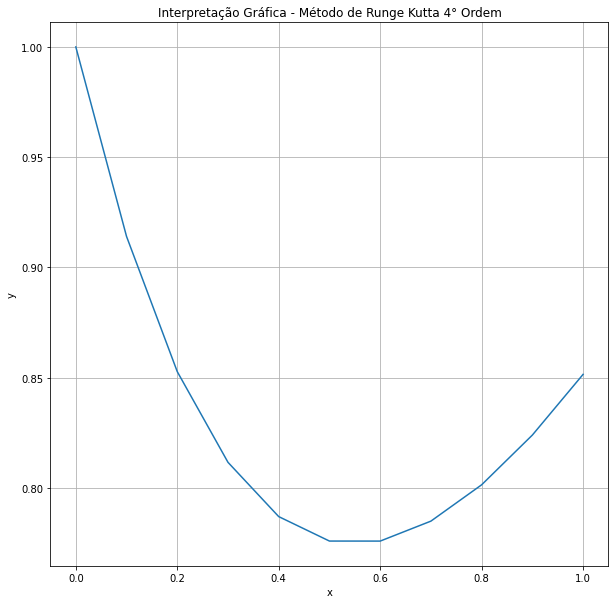

In [9]:
InterpretacaoGrafica(x,y)

#### Exemplo 4<br><br> y'1 = y1 - y1*y2 <br>  y'2 = -y2 - y1*y2 <br> y1(0) = 2 y2(0) = 1

In [10]:
def f_expr(expression):
    # Função para criar uma função a partir de uma expressão
    # Entrada: expressão em formato de string
    # Saída: função em formato de lambda
    return eval(f'lambda t, y1, y2: {expression}')


# Definição das expressões das funções f(y1, y2) e g(y1, y2)
fy1 = f_expr('y1 - y1 * y2')
fy2 = f_expr('-y2 - y1 * y2')

# Parâmetros do problema
t0 = 0
x0 = 2
y0 = 1
h = 0.1  # Tamanho do passo
n = 10   # Número de passos

# Resolvendo o sistema de equações diferenciais usando o método de Runge-Kutta de quarta ordem
t_values, y1_values, y2_values = runge_kutta_4th_order_system(fy1, fy2, t0, x0, y0, h, n)

# Criando um DataFrame para exibir os resultados
saida = pd.DataFrame({'t': t_values, 'y1': y1_values, 'y2': y2_values})
saida

,t,y1,y2
0,0.0,2.000000,1.000000
1,0.1,2.027445,0.740151
2,0.2,2.102194,0.544988
3,0.3,2.217111,0.397484
4,0.4,2.368587,0.286063
5,0.5,2.555060,0.202427
6,0.6,2.776240,0.140356
7,0.7,3.032700,0.095025
8,0.8,3.325660,0.062595
9,0.9,3.656888,0.039969


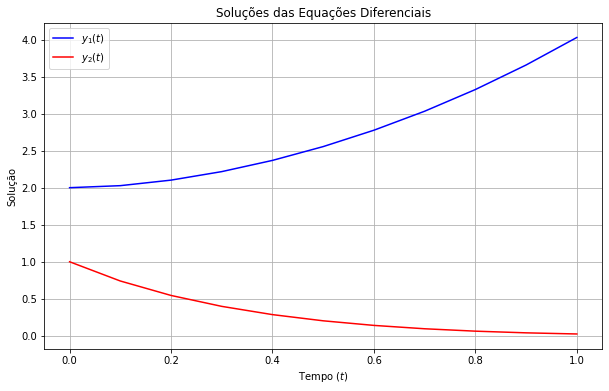

In [12]:
InterpretacaoGraficaMultiplasCurvas(t_values,y1_values,y2_values)